In [1]:
#Kutubxonalar
import torch
import fastai

In [21]:
fastai.__version__

'2.7.14'

In [ ]:
#GPUni tekshirish
torch.cuda.is_available()

In [ ]:
#ToolKitni klon qilamiz
#!git clone https://github.com/EscVM/OIDv4_ToolKit.git

In [ ]:
#ToolKitni requirementslarini o'rnatish
#!cd OIDv4_ToolKit && pip install -r requirements.txt

In [ ]:
#main.pyning funksiyalari haqida ma'lumot
!cd OIDv4_ToolKit && python main.py -h

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Dragonfly Butterfly Bee --type_csv train --limit 200

#Modelni o'qitish

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

# path
path = Path('train')
# fls = get_image_files(path)
failed = verify_images(path)
failed

In [9]:
# Datablock yaratamiz
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

# Dataloader yaratamiz
dls = transports.dataloaders(path)

In [10]:
#datasetni tekshirish
dls.train.show_batch(max_n=32, nrows=4)

Output hidden; open in https://colab.research.google.com to view.

In [11]:
# O'qitish (train)
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 151MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.325274,0.495988,0.841667,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.394412,0.242692,0.933333,00:10
1,0.264453,0.188359,0.933333,00:09
2,0.201310,0.221020,0.925000,00:08
3,0.159779,0.234680,0.925000,00:09


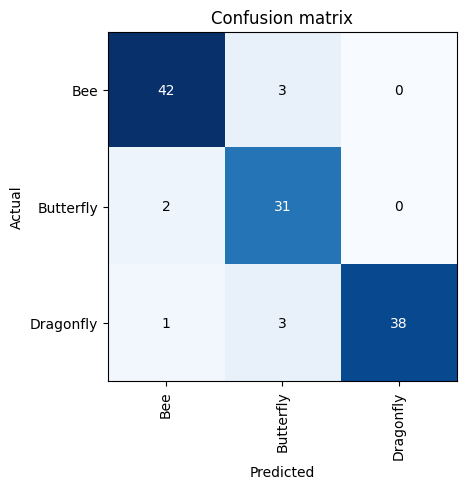

In [12]:
# tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

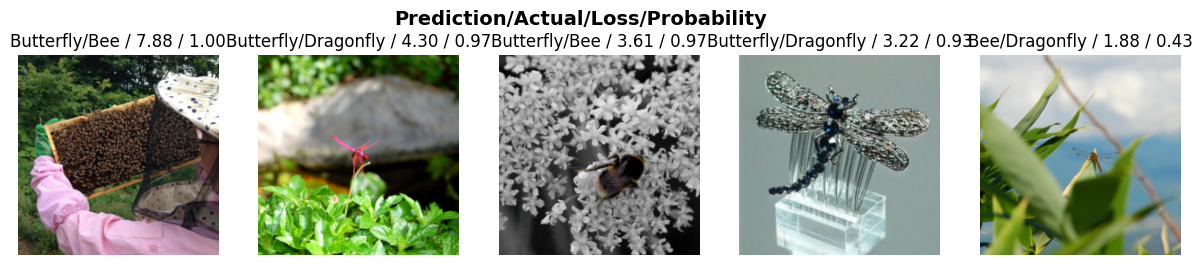

In [13]:
interp.plot_top_losses(5, nrows=1)

In [14]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat: Bee
Ehtimollik: 99.98902


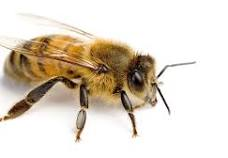

In [15]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat: {pred}')
print(f'Ehtimollik: {probs[pred_id]*100:.5f}')
img

Bashorat: Dragonfly
Ehtimollik: 99.99892


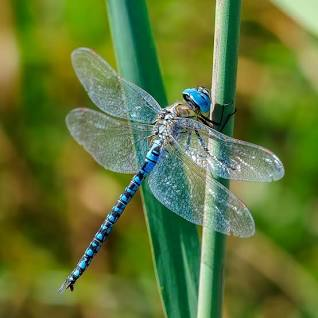

In [16]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat: {pred}')
print(f'Ehtimollik: {probs[pred_id]*100:.5f}')
img

Bashorat: Butterfly
Ehtimollik: 99.96378


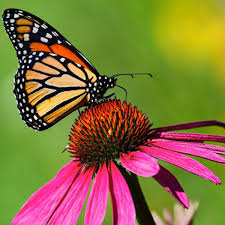

In [17]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat: {pred}')
print(f'Ehtimollik: {probs[pred_id]*100:.5f}')
img

In [18]:
#Modelni saqlab olamiz
learn.export('insects_model.pkl')

In [19]:
#Modelni yuklab olib tekshiramiz
model = load_learner('/content/insects_model.pkl')

In [20]:
model.predict(img)

('Butterfly', tensor(1), tensor([3.5441e-04, 9.9964e-01, 7.9050e-06]))

##Navbat deploy qilishga